In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit as QuantumCircuitQiskit, Aer

from simulators.clifford import GraphStateSimulator
from simulators.statevector import StatevectorSimulator
from lib.executor import Executor
from lib.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [2]:
def GHZ(n, sim):
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')
    circuit = QuantumCircuit(q, c)

    circuit.H(0)
    for i in range(n - 1):
        circuit.CX(i, i + 1)
    circuit.measure()

    exec = Executor(circuit)
    return exec.run(sim, shots=100)

In [3]:
def GHZ_qiskit(n, method):
    circuit = QuantumCircuitQiskit(n)

    circuit.h(0)
    for i in range(n - 1):
        circuit.cx(i, i + 1)
    circuit.measure_all()

    backend = Aer.get_backend(method)
    job = backend.run(circuit, shots=100)
    job.wait_for_final_state()
    return job.result()

In [4]:
qiskit_methods = [('Qiskit statevector', 'statevector_simulator', 25), ('Qiskit stabilizer', 'aer_simulator_stabilizer', 30)]
own_methods = [('Graph state simulator', GraphStateSimulator, 30), ('Statevector simulator', StatevectorSimulator, 12)]

results = {
    'Qiskit statevector': list(),
    'Qiskit stabilizer': list(),
    'Graph state simulator': list(),
    'Statevector simulator': list()
}

In [5]:
for name, method, r in qiskit_methods:
    for n in range(1, r):
        begin = time.process_time()
        GHZ_qiskit(n, method)
        end = time.process_time()
        results[name].append(end - begin)

In [6]:
for name, method, r in own_methods:
    for n in range(1, r):
        begin = time.process_time()
        GHZ(n, method)
        end = time.process_time()
        results[name].append(end - begin)

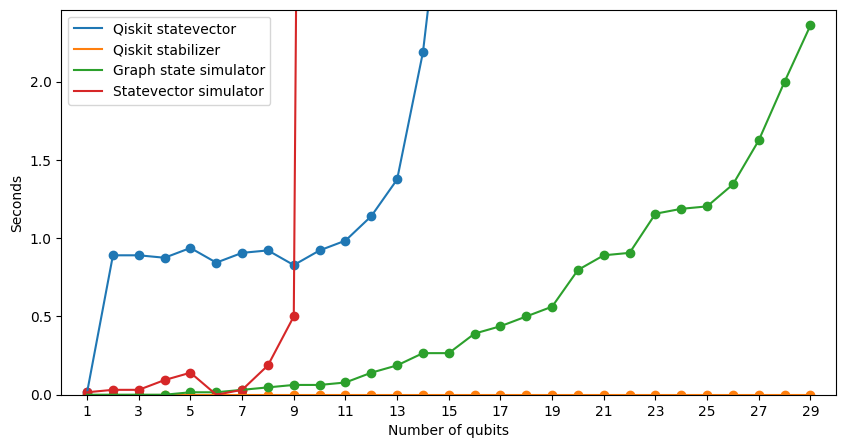

In [22]:
fig = plt.figure(figsize=(10, 5))
for name in results:
    plt.plot(range(1, len(results[name]) + 1), results[name], label=name)
    plt.scatter(range(1, len(results[name]) + 1), results[name], marker='o')

plt.xticks(range(1, 31, 2))
plt.axis([0, 30, 0, np.max(results['Graph state simulator']) + 0.1])
plt.xlabel('Number of qubits')
plt.ylabel('Seconds')
plt.legend();

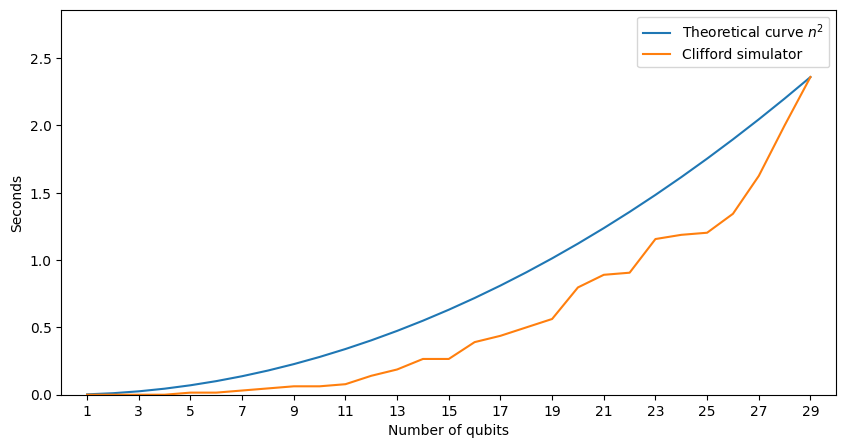

In [10]:
fig = plt.figure(figsize=(10, 5))
x = np.arange(1, 30)
y = x * x
y = (y / np.max(y)) * np.max(results['Graph state simulator'])
plt.plot(x, y, label='Theoretical curve $n^2$')
plt.plot(range(1, 30), results['Graph state simulator'], label='Clifford simulator')

plt.xticks(range(1, 31, 2))
plt.axis([0, 30, 0, np.max(results['Graph state simulator']) + 0.5])
plt.xlabel('Number of qubits')
plt.ylabel('Seconds')
plt.legend();